<a href="https://colab.research.google.com/github/dudeh534/Mirae_Exit/blob/main/Stockcastic_Volume_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글드라이브 연동용
import os, sys
from google.colab import drive
drive.mount('/content/drive')


my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
os.symlink('/content/drive/My Drive/Colab Notebooks/my_env', my_path)
sys.path.insert(0, my_path)

Mounted at /content/drive


In [ ]:
# 종목 데이터 csv로 저장

import FinanceDataReader as fdr

df=fdr.DataReader('LCID',"2020-01-01", "2023-08-18")
df.to_csv("LCID.csv")

Initial Portfolio Value : 10,000,000 KRW
BUY Portfolio Value : 10,000,000 KRW
CLOSE volume : 8
SELL Portfolio Value : 16,061,046 KRW
CLOSE volume : 14
BUY Portfolio Value : 16,209,337 KRW
CLOSE volume : 15
SELL Portfolio Value : 16,534,457 KRW
CLOSE volume : 15
BUY Portfolio Value : 16,524,654 KRW
CLOSE volume : 14
SELL Portfolio Value : 16,674,891 KRW
CLOSE volume : 14
BUY Portfolio Value : 16,790,496 KRW
CLOSE volume : 15
SELL Portfolio Value : 15,449,102 KRW
CLOSE volume : 14
BUY Portfolio Value : 15,003,332 KRW
CLOSE volume : 17
SELL Portfolio Value : 19,625,676 KRW
CLOSE volume : 23
BUY Portfolio Value : 19,593,784 KRW
CLOSE volume : 21
SELL Portfolio Value : 19,459,584 KRW
CLOSE volume : 21
BUY Portfolio Value : 18,676,226 KRW
CLOSE volume : 22
SELL Portfolio Value : 188,303,231 KRW
CLOSE volume : 237
BUY Portfolio Value : 190,501,529 KRW
CLOSE volume : 336
SELL Portfolio Value : 142,455,049 KRW
CLOSE volume : 247
Final Portfolio Value   : 140,853,954 KRW
수익률 : 1,308.5 %


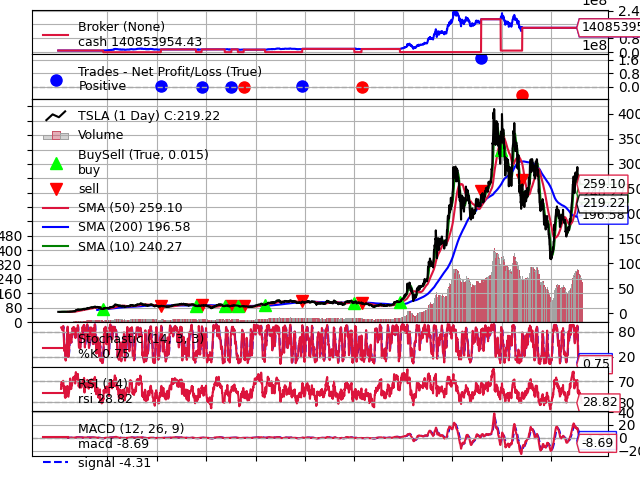

In [ ]:
# 필요한 모듈 임포트
import backtrader as bt
import yfinance as yf
import datetime
import backtrader.feeds as btfeeds
from IPython.display import display, Image

# 백테스팅에 사용할 데이터 불러오기
class customCSV(btfeeds.GenericCSVData):
    params=(
        ('dtformat', '%Y-%m-%d'),
        ('datetime', 0),
        ('time', -1),
        ('open', 1),
        ('high', 2),
        ('low', 3),
        ('close', 4),
        ('volume', 5),
        ('openinterest', -1),
        )

# 백테스팅에 사용할 전략 클래스 정의
class StockcasticStrategy(bt.Strategy):
    # Set the parameters
    params = dict(
        #이용할 지표 설정값들
        stoch_period = 14, # Stochastic Oscillator period
        stoch_upper = 70, # Overbought threshold
        stoch_lower = 30, # Oversold threshold
        rsi_period = 14, # RSI period
        rsi_upper = 70, # Overbought threshold
        rsi_lower = 30, # Oversold threshold
        macd_fast = 12, # MACD short-term moving average period
        macd_slow = 26, # MACD long-term moving average period
        macd_signal = 9, # MACD signal line period
        ma_fast = 50, # Short-term moving average period
        ma_slow = 200, # Long-term moving average period
        #size = 10 # Trading unit (shares)
    )

    def __init__(self):
        # Create indicators

        #stockcastic
        self.stoch = bt.indicators.Stochastic(self.data,
                                              period=self.p.stoch_period,
                                              safediv=True)
        #rsi
        self.rsi = bt.indicators.RSI(self.data,
                                     period=self.p.rsi_period)
        #macd
        self.macd = bt.indicators.MACD(self.data,
                                       period_me1=self.p.macd_fast,
                                       period_me2=self.p.macd_slow,
                                       period_signal=self.p.macd_signal)
        # 골든크로스
        self.ma_fast = bt.indicators.SMA(self.data,
                                         period=self.p.ma_fast)
        self.ma_slow = bt.indicators.SMA(self.data,
                                         period=self.p.ma_slow)
        # 거래량
        self.volume = self.data.volume
        self.volume_ma = bt.indicators.SMA(self.volume, period=10) # 거래량의 10일 이동 평균

    #입맛에 맞게 쓰십셔
    def next(self):
        # Implement trading logic
        if not self.position: # No position
            if (self.stoch[0] < self.p.stoch_lower and # Stochastic oversold
                #self.rsi[0] > 50 or # RSI uptrend confirmation
                #self.macd[0] > self.macd[-1] or # MACD momentum increase
                self.ma_fast[0] > self.ma_slow[0] and # Golden cross
                  (self.data.close[0] > self.data.close[-1] and # 주가가 상승하고
                    self.volume[0]*2 > self.volume[-1] and #전날대비 거래량이 2배 터짐
                    self.volume[0] > self.volume_ma[0])):
                print(f'BUY Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
                print(f'CLOSE volume : {data.close[0]:,.0f}')
                self.buy() # Buy
        else: # Have position
            if (self.stoch[0] > self.p.stoch_upper
                and # Stochastic overbought
                #self.rsi[0] < 50 or # RSI downtrend confirmation
                #self.macd[0] < self.macd[-1] or # MACD momentum decrease
                self.ma_fast[0] < self.ma_slow[0]
                #and(self.data.close[0] < self.data.close[-1] and # 주가가 하락하고
                #    self.volume[0] > self.volume_ma[0])
                ): # Death cross
                print(f'SELL Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
                print(f'CLOSE volume : {data.close[0]:,.0f}')
                self.close() # Sell



# 백테스팅 엔진 객체 생성
cerebro = bt.Cerebro()

# 데이터 추가
data=customCSV(dataname="TSLA.csv")
cerebro.adddata(data)

# 전략 추가
cerebro.addstrategy(StockcasticStrategy)

# 자본금 설정
cerebro.broker.setcash(10000000)

# 수수료 설정 (0.15%)
cerebro.broker.setcommission(commission=0.0014)

#주 수
cerebro.addsizer(bt.sizers.PercentSizer, percents=95)

print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
KRW_initial = cerebro.broker.getvalue()
cerebro.run()
print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
KRW_final = cerebro.broker.getvalue()
profit_ratio = (KRW_final - KRW_initial) / KRW_initial * 100
print(f'수익률 : {profit_ratio:,.1f} %')

cerebro.plot()[0][0].savefig('plot.png', dpi=100)
display(Image(filename='plot.png'))

Initial Portfolio Value : 10,000,000 KRW
[2014-12-16] BUY  : 주가 13, 수량 661,635, 수수료 12,405, 자산 9,851,738
[2015-04-29] SELL : 주가 15, 수량 -661,635, 수수료 14,206, 자산 11,259,607
[2015-10-26] BUY  : 주가 14, 수량 726,982, 수수료 14,342, 자산 11,433,310
[2016-03-10] SELL : 주가 14, 수량 -726,982, 수수료 14,249, 자산 11,164,133
[2016-05-06] BUY  : 주가 14, 수량 712,503, 수수료 14,023, 자산 11,342,961
[2017-01-04] SELL : 주가 14, 수량 -712,503, 수수료 14,281, 자산 11,320,130
[2018-03-28] BUY  : 주가 18, 수량 547,395, 수수료 13,517, 자산 11,058,461
[2019-10-28] SELL : 주가 22, 수량 -547,395, 수수료 16,734, 자산 13,587,479
[2020-03-19] BUY  : 주가 25, 수량 507,810, 수수료 17,759, 자산 15,361,949
[2020-04-20] SELL : 주가 49, 수량 -507,810, 수수료 34,727, 자산 25,654,715
[2021-03-05] BUY  : 주가 209, 수량 111,463, 수수료 32,565, 자산 24,577,739
[2021-10-20] SELL : 주가 288, 수량 -111,463, 수수료 45,012, 자산 34,467,820
[2022-10-12] BUY  : 주가 215, 수량 143,284, 수수료 43,195, 자산 34,698,299
[2023-02-03] SELL : 주가 184, 수량 -143,284, 수수료 36,900, 자산 29,891,465
[2023-05-03] BUY  : 주가 160, 수량 167,814,

<IPython.core.display.Javascript object>

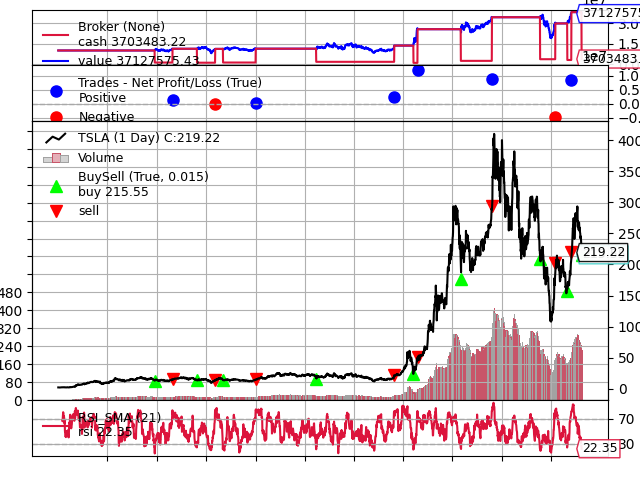

In [ ]:
import backtrader as bt
import yfinance as yf
import datetime
import backtrader.feeds as btfeeds
from IPython.display import display, Image


#https://lunadaddy.tistory.com/114
# Create a subclass of Strategy to define the indicators and logic
class customCSV(btfeeds.GenericCSVData):
    params=(
        ('dtformat', '%Y-%m-%d'),
        ('datetime', 0),
        ('time', -1),
        ('open', 1),
        ('high', 2),
        ('low', 3),
        ('close', 4),
        ('volume', 5),
        ('openinterest', -1),
        )

class MyStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY  : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}')
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log(f'SELL : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}')
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELD')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None

    def next(self):
        if not self.position:
            if self.rsi < 25:
                self.order = self.buy()
        else:
            if self.rsi > 80:
                self.order = self.sell()

    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)
data=customCSV(dataname="TSLA.csv")

cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission=0.0014)
cerebro.addsizer(bt.sizers.PercentSizer, percents=90)

print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW')
KRW_initial = cerebro.broker.getvalue()
cerebro.run()
print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW')
KRW_final = cerebro.broker.getvalue()
profit_ratio = (KRW_final - KRW_initial) / KRW_initial * 100
print(f'수익률 : {profit_ratio:,.1f} %')

cerebro.plot()[0][0].savefig('plot.png', dpi=100)
display(Image(filename='plot.png'))